# Supplementary Figure 1: Empirical evidence of inverse logit function

An example of the applicability of the inverse logit function when considering the approximate empirical probability of hail as a function of population density. A 30 mm MESH threshold was used in this figure to define hail events. Results for other MESH thresholds are similar qualitatively.

## Package imports

In [1]:
additional_package_lib <- "/scratch/w42/ig1052/rlibs"

suppressPackageStartupMessages({
  library(tidyverse)
  library(scico)
  library(patchwork)
  library(latex2exp, lib.loc = additional_package_lib)
})

## Reading in data

In [2]:
# reading model data
model_data <- read_csv(paste0("/g/data/w42/ig1052/bayesian_paper_data/modelling_data/",
                              "filtered_allpredictors_noedges_popdens_ssa_variable_diameter_",
                              "comment_radar_66_variable_mesh_t_x_y_binned_t_2010-01-01_",
                              "2016-04-24_6_x_151.75_153.50_0.25_y_-29.00_-26.50_0.25.csv"),
                      show_col_types = FALSE)

## Plotting

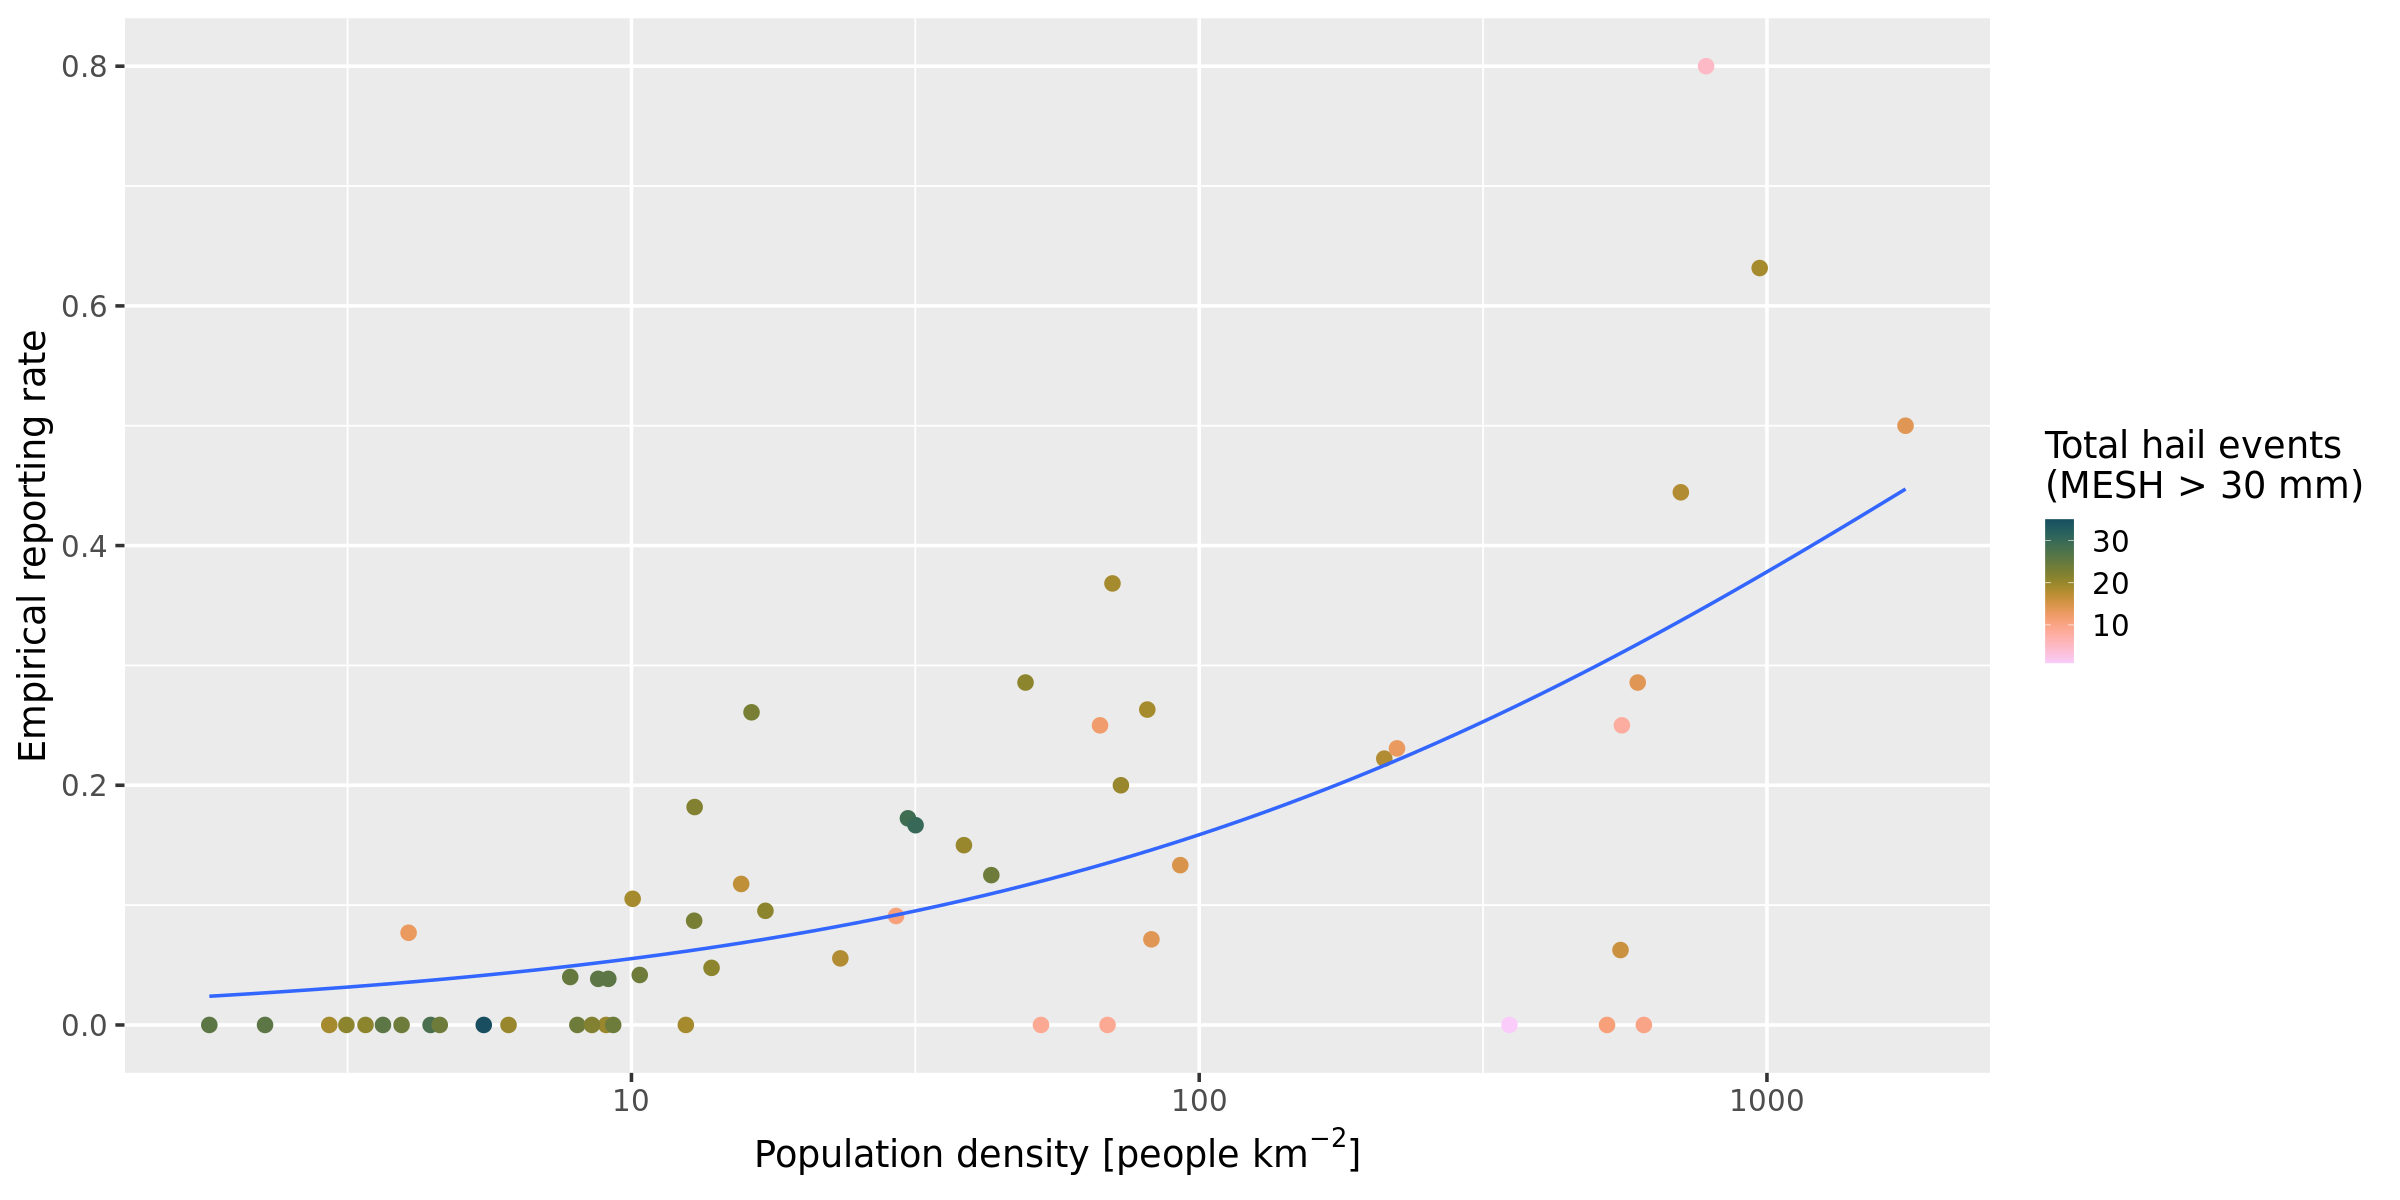

In [3]:
# display size
options(repr.plot.width = 20, repr.plot.height = 10)

# mesh threshold
mesh_threshold <- 30

# plotting
model_data %>%
  # grouping by location
  group_by(x_bins, y_bins) %>%
  # summarising into each bin
  summarise(pop_dens = mean(pop_dens), # same for each space so does nothing
            num_hail_events = sum(mesh > mesh_threshold), # num hail events 
            num_reports = sum(report), .groups = "drop") %>% # num reports
  # empirical reporting probability
  mutate(prob_report = num_reports / num_hail_events) %>%
  # plotting
  ggplot(aes(x = pop_dens, y = prob_report)) + 
  geom_point(aes(color = num_hail_events), size = 4) +
  # log scale for popualtion density
  scale_x_log10() +
  # labelling
  labs(color = paste("Total hail events\n(MESH >", mesh_threshold, "mm)")) +
  xlab(TeX("Population density [people km$^{-2}$]")) +
  ylab("Empirical reporting rate") +
  # using non-linear least squares to fit inverse logit
  geom_smooth(method = "nls", formula = "y ~ 1/(1 + exp(-(a*x + b)))", 
              method.args = list(start = list(a = 0, b = -1)), se = FALSE) +
  # size
  theme_gray(base_size = 22) +
  # colour
  scale_color_scico(palette = "batlow", direction = -1, begin = 0.2)